<a href="https://colab.research.google.com/github/mpHarm88/DS-Unit-2-Applied-Modeling/blob/master/module3/Mikio_Harman_assignment_applied_modeling_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox.I Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [0]:
df1 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df2 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
df3 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv')
df4 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
df5 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv')
df6 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv')
df7 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv')
df8 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df9 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')
df10 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv')
df11 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv')
df12 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [0]:
all_df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12] #combine together 
df_combined = pd.concat(all_df)
print('df_combined shape:',df_combined.shape)

df_combined = df_combined.fillna(df_combined.median())              #fillling NaN with mean
df_combined['CO_transformed'] = np.log1p(df_combined['CO']) #log the CO values
testing = df_combined[df_combined['year']==2017] #separating train/test
training = df_combined[df_combined['year']<2017]


print('The training shape before train/val split is:',training.shape)

train, val = train_test_split(training,          #split train/val
                              test_size=0.20,
                             random_state=42)
print('Train shape:',train.shape)
print('Val shape:',val.shape)
print('Test shape:',testing.shape)
df_combined.describe()

df_combined shape: (420768, 18)
The training shape before train/val split is: (403776, 19)
Train shape: (323020, 19)
Val shape: (80756, 19)
Test shape: (16992, 19)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,CO_transformed
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.278489,104.256193,15.641507,50.418633,1214.493362,56.981874,13.539885,1010.746658,2.491405,0.064416,1.729461,6.775899
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.056799,91.108745,21.455419,34.642023,1133.542988,55.802413,11.430768,10.469168,13.787252,0.820626,1.245947,0.809128
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,4.615121
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,6.216606
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,6.803505
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,7.313887
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,9.210440


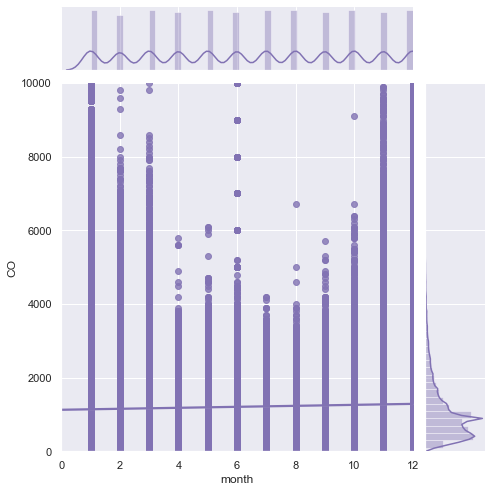

In [0]:
#Visualize first target CO and see its distribution
sns.set(style="darkgrid")

g = sns.jointplot('month',"CO", data=df_combined, kind="reg",
                  xlim=(0, 12), ylim=(0, 10000), color="m", height=7)


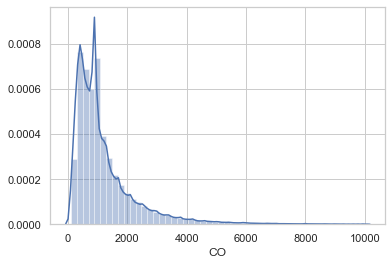

In [0]:
#Visualize before log transform
sns.set(style="whitegrid", font='sans-serif')
sns.distplot(df_combined['CO'])

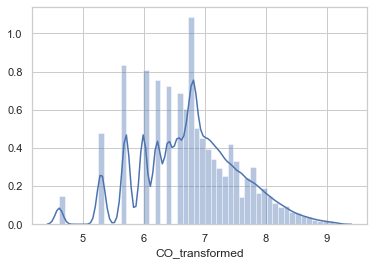

In [0]:
#Visualize after log transform
sns.set(style="whitegrid", font='sans-serif')
sns.distplot(df_combined['CO_transformed'])

In [0]:
target = 'CO_transformed'
dropped = ['CO', 'CO_transformed']
X_train = train.drop(columns=dropped)
y_train = train[target]

X_val = val.drop(columns=dropped)
y_val = val[target]

X_test = testing.drop(columns=dropped)
y_test = testing[target]

X_train_CV = training.drop(columns=dropped)
y_train_CV = training[target]

In [0]:
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators=100, n_jobs=-1)
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
pipe.score(X_val,y_val)

0.8958653591634759

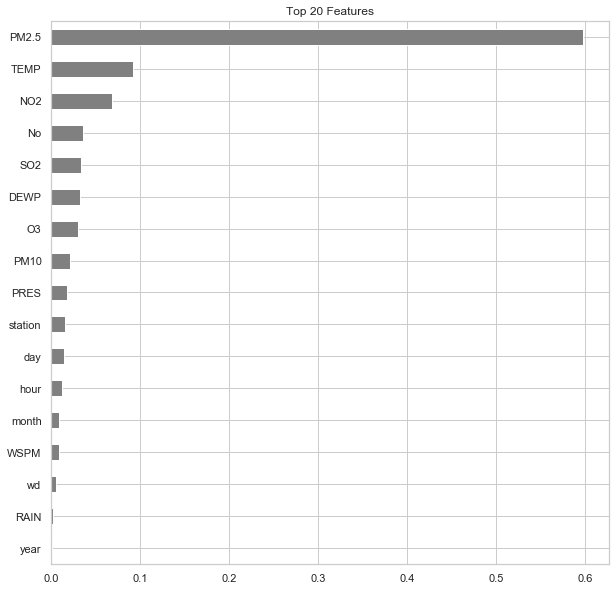

In [0]:
rf = pipe.named_steps['randomforestregressor']

importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10, n/2))
plt.title('Top 20 Features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
# BEFORE: Sequence of the feature to be permuted
feature = 'PM2.5'

# PERMUTE
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

#AFTER: Sequence has changed
print(X_val_permuted[feature].head())

score_permuted = pipe.score(X_val_permuted, y_val)
print('Score after permutation of PM2.5:',score_permuted)

27465    79.0
25917    15.0
18989    59.0
12019    56.0
27926     5.0
Name: PM2.5, dtype: float64
Score after permutation of PM2.5: 0.5048982243673892


In [0]:
#ELI5

transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),   
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='r2',
    n_iter=2,
    random_state=42
)

permuter.fit(X_val_transformed, y_val);

In [0]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

PM2.5      0.389796
DEWP       0.162174
NO2        0.153458
SO2        0.099330
TEMP       0.092388
No         0.065580
O3         0.056446
station    0.032701
PM10       0.029579
PRES       0.024523
month      0.023233
day        0.017382
hour       0.015344
WSPM       0.003142
wd         0.001284
RAIN       0.001170
year       0.000862
dtype: float64

In [0]:
eli5.show_weights(
    permuter,
    top=None, 
    feature_names=feature_names,
)

Weight,Feature
0.3898 ± 0.0043,PM2.5
0.1622 ± 0.0006,DEWP
0.1535 ± 0.0016,NO2
0.0993 ± 0.0012,SO2
0.0924 ± 0.0028,TEMP
0.0656 ± 0.0002,No
0.0564 ± 0.0005,O3
0.0327 ± 0.0004,station
0.0296 ± 0.0002,PM10
0.0245 ± 0.0005,PRES


In [0]:
min_importance = .001
mask = permuter.feature_importances_ > min_importance
features = X_train.columns[mask]
X_train = X_train[features]

In [0]:
X_val = X_val[features]

pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators=100, n_jobs=-1)
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
pipe.score(X_val,y_val)

0.8955718154531996

In [0]:
#XG Boost
from xgboost import XGBRegressor
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train)

/Users/mph/anaconda3/envs/unit2/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mph/anaconda3/envs/unit2/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[08:15:35] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['wd', 'station'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'wd', 'data_type': dtype('O'),
                                          'mapping': N       1
W       2
NNE     3
NW      4
NNW     5
E       6
SSE     7
WNW     8
SSW     9
ENE    10
SW     11
NE     12
ESE    13
SE     14
WSW    15
S      16
NaN    17
dtype: int64},
                                         {'col': 'station',
                                          'data_type': dtype('O'),
                                          'mapping': Dongsi            1
Wanshouxigon...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, 

In [0]:
from sklearn.metrics import r2_score
y_pred= pipeline.predict(X_val)
r2_score(y_val, y_pred)

0.8012866740489066

In [0]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

X_train.shape, X_val.shape, X_train_encoded.shape, X_val_encoded.shape

((323020, 16), (80756, 16), (323020, 16), (80756, 16))

In [0]:
eval_set = [(X_train_encoded, y_train),
           (X_val_encoded, y_val)]

model = XGBRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.1,
    )

model.fit(X_train_encoded, y_train, eval_set=eval_set,
          #scoring by root mean squared error
          early_stopping_rounds=50) #stopping after 50 rounds of no improvement to val score

/Users/mph/anaconda3/envs/unit2/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mph/anaconda3/envs/unit2/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[08:15:44] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.69296	validation_1-rmse:5.69765
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:5.12707	validation_1-rmse:5.13062
[2]	validation_0-rmse:4.61696	validation_1-rmse:4.62076
[3]	validation_0-rmse:4.15885	validation_1-rmse:4.16205
[4]	validation_0-rmse:3.74656	validation_1-rmse:3.74954
[5]	validation_0-rmse:3.37585	validation_1-rmse:3.3786
[6]	validation_0-rmse:3.04248	validation_1-rmse:3.04512
[7]	validation_0-rmse:2.7428	validation_1-rmse:2.74541
[8]	validation_0-rmse:2.47365	validation_1-rmse:2.47609
[9]	validation_0-rmse:2.23176	validation_1-rmse:2.23413
[10]	validation_0-rmse:2.01455	validation_1-rmse:2.01686
[11]	validation_0-rmse:1.81968	validation_1-rmse:1.8

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
results = model.evals_result()
results['validation_0']

{'rmse': [5.69296,
  5.127066,
  4.616963,
  4.158848,
  3.746559,
  3.375846,
  3.04248,
  2.7428,
  2.473653,
  2.231762,
  2.014548,
  1.819682,
  1.644849,
  1.488203,
  1.347958,
  1.222487,
  1.110414,
  1.010453,
  0.921262,
  0.842078,
  0.77197,
  0.710118,
  0.655521,
  0.607643,
  0.565696,
  0.52915,
  0.497394,
  0.470112,
  0.446398,
  0.426215,
  0.409001,
  0.394061,
  0.381416,
  0.370996,
  0.361399,
  0.353894,
  0.34725,
  0.341535,
  0.336546,
  0.332924,
  0.329188,
  0.326281,
  0.322595,
  0.320418,
  0.318656,
  0.316862,
  0.314917,
  0.313743,
  0.312136,
  0.310995,
  0.30957,
  0.30893,
  0.30804,
  0.307275,
  0.30656,
  0.305672,
  0.304889,
  0.30404,
  0.303426,
  0.303116,
  0.302794,
  0.302335,
  0.301546,
  0.301093,
  0.30085,
  0.30055,
  0.299894,
  0.2993,
  0.298727,
  0.298034,
  0.297597,
  0.29713,
  0.295557,
  0.295097,
  0.294893,
  0.294773,
  0.294465,
  0.294254,
  0.293797,
  0.293464,
  0.292958,
  0.292611,
  0.292391,
  0.292226,
 

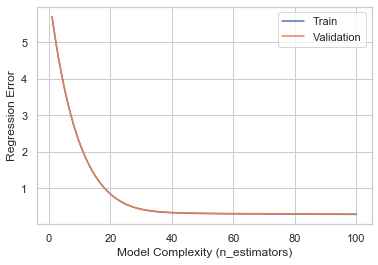

In [0]:
train_error = results['validation_0']['rmse']
val_error = results['validation_1']['rmse']
epoch = range(1, len(train_error)+1)

#Plotting the validation curve
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Regression Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.legend();

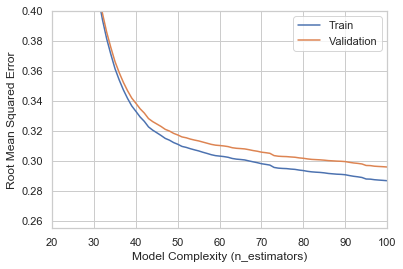

In [0]:
#Zooming in on validation curve
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim(.255,.40)
plt.xlim(20,100)
plt.legend();

In [0]:
#PDP Plot
import matplotlib.pyplot as plt
plt.rcparams['figure.dpi'] = 72

AttributeError: module 'matplotlib.pyplot' has no attribute 'rcparams'

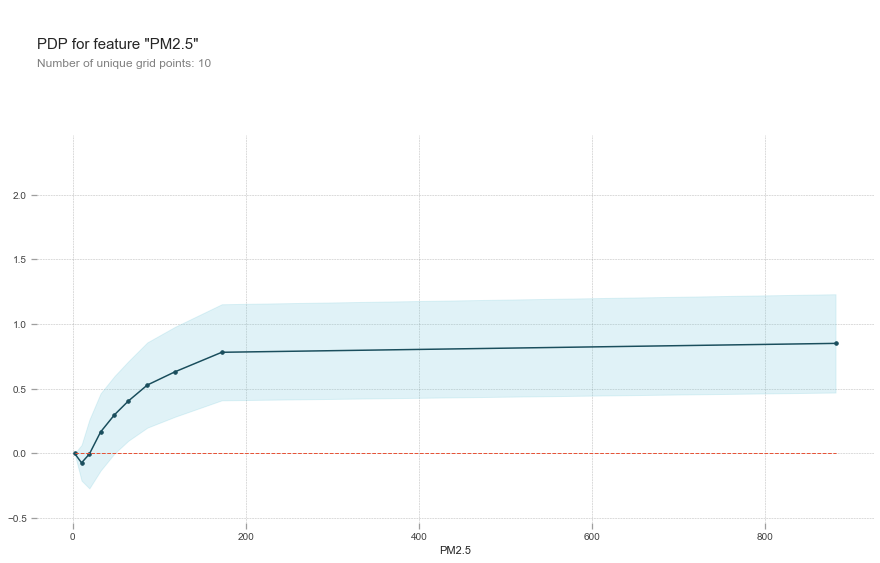

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'PM2.5'
isolated = pdp_isolate(
    model = model,
    dataset = X_val_encoded,
    model_features = X_val.columns,
    feature = feature
)

pdp_plot(isolated, feature_name=feature);

In [0]:
X_val.head()

,No,month,day,hour,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
27465,27466,4,18,9,10.0,53.0,3.0,7.0,80.0,14.3,1004.6,-7.2,0.0,SW,2.3,Dingling
25917,25918,2,13,21,6.0,6.0,2.0,9.0,68.0,-3.4,1027.3,-20.7,0.0,WNW,6.3,Shunyi
18989,18990,5,1,5,158.0,182.0,12.0,55.0,71.0,19.2,1000.3,14.2,0.0,SE,0.4,Gucheng
12019,12020,7,14,19,36.0,58.0,7.0,37.0,207.0,30.0,995.8,15.3,0.0,NNE,2.0,Guanyuan
27926,27927,5,7,14,3.0,30.0,2.0,15.0,123.0,25.9,1012.8,-6.9,0.0,SSW,2.0,Wanshouxigong


(0, 900)

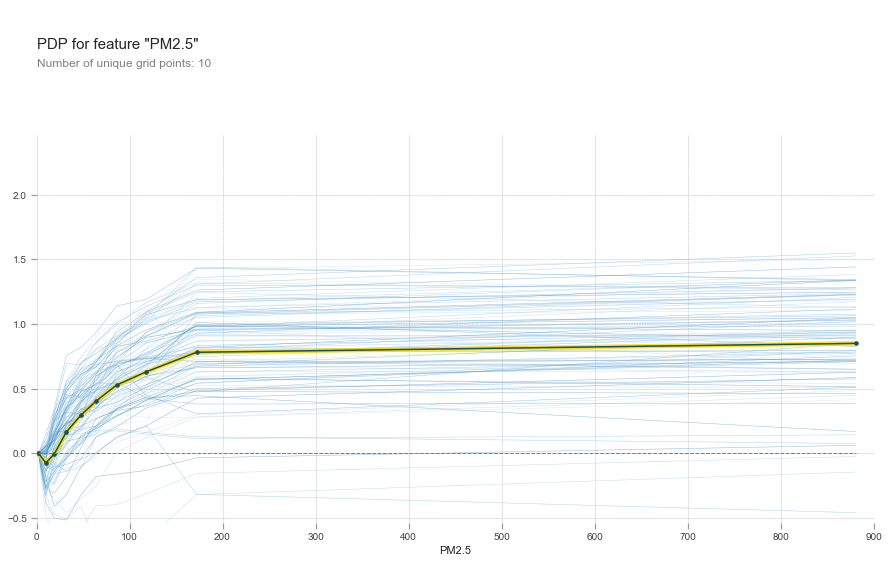

In [0]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0,900)

In [0]:
len(X_val)*10

807560

In [0]:
isolated = pdp_isolate(
    model = model,
    dataset = X_val_encoded,
    model_features = X_val.columns,
    feature=feature,
    num_grid_points=50
)

pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0,400)

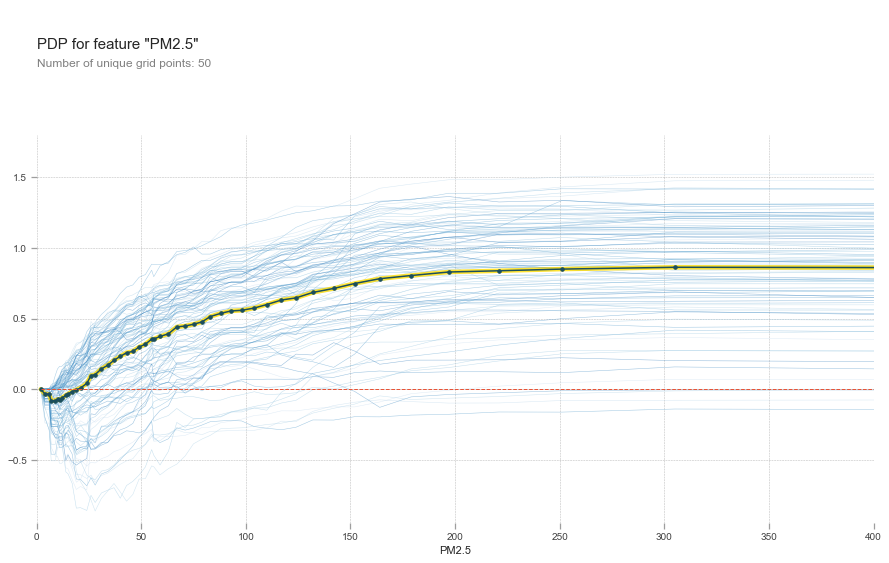

In [0]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0,400)
plt.ylim(-.95,1.8);

In [0]:
grid = isolated.feature_grids

isolated.pdp

array([6.4256406, 6.3916526, 6.3896093, 6.3431344, 6.3444343, 6.353177 ,
       6.348461 , 6.3616796, 6.3821383, 6.391037 , 6.4086027, 6.420533 ,
       6.4343543, 6.466105 , 6.521531 , 6.529096 , 6.5692735, 6.595131 ,
       6.6302223, 6.657994 , 6.6833324, 6.6931877, 6.724069 , 6.7443256,
       6.779659 , 6.780158 , 6.7991023, 6.817757 , 6.866556 , 6.8729973,
       6.885475 , 6.9019012, 6.939736 , 6.962704 , 6.9796896, 6.983949 ,
       7.0001464, 7.0248575, 7.056918 , 7.072212 , 7.1106334, 7.1391196,
       7.173998 , 7.2078834, 7.2305355, 7.255475 , 7.2641196, 7.2760096,
       7.288873 , 7.276473 ], dtype=float32)

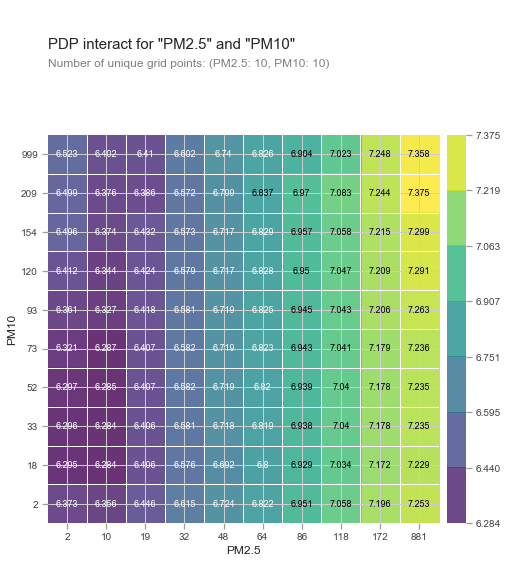

In [0]:
#PDP 2 features
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['PM2.5', 'PM10']

interaction = pdp_interact(
    model = model,
    dataset = X_val_encoded,
    model_features=X_val.columns,
    features = features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [0]:
len(X_val_encoded) * 10**2

features

8075600

(10, 0)

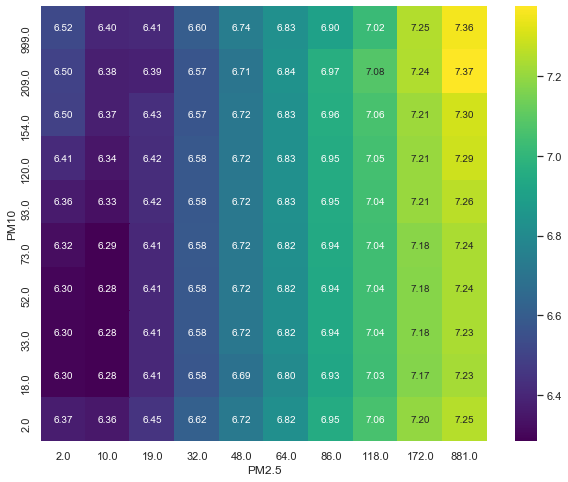

In [0]:
pdp = interaction.pdp.pivot_table(
    values = 'preds',
    columns=features[0],
    index=features[1]    
)[::-1]  #Slice notation to reverse index order so y axis is ascending

plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.ylim(10,0)

In [0]:
import plotly.graph_objs as go

In [0]:
surface = go.Surface(
    x=pdp.columns,
    y=pdp.index,
    z=pdp.values

)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show();